C:\Users\PMLS\AppData\Local\Temp\ipykernel_24592\4227460528.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Grade",y="Math",data=df,palette="Blues_d")


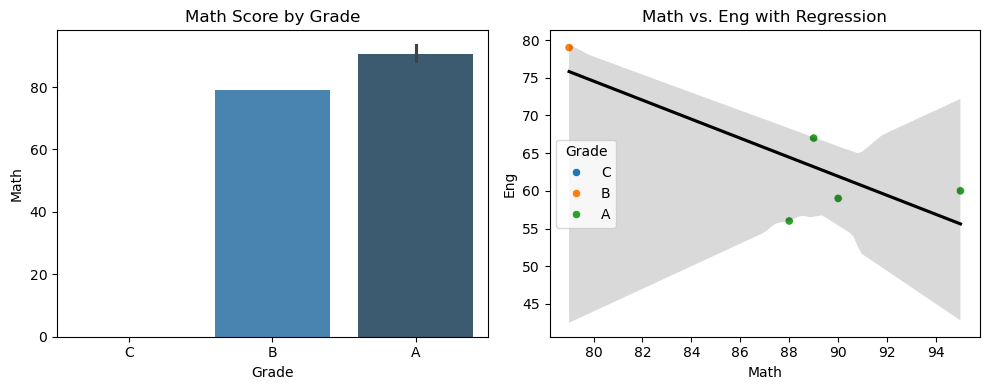

                            OLS Regression Results                            
Dep. Variable:                    Eng   R-squared:                       0.634
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     5.203
Date:                Tue, 15 Apr 2025   Prob (F-statistic):              0.107
Time:                        12:17:46   Log-Likelihood:                -15.120
No. Observations:                   5   AIC:                             34.24
Df Residuals:                       3   BIC:                             33.46
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        175.5623     48.905      3.590      0.0

E:\python\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


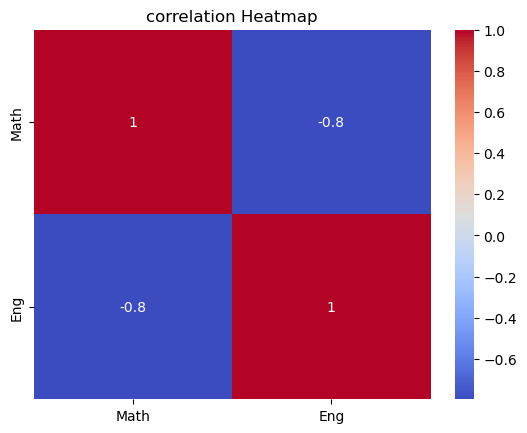

T_test p_vLUE: 0.0011465920428410132


In [3]:
# Student Score Anaysis
# Visualized Math/Eng Scores with Seaborn , ran regression with Statmodels
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.api as sm
# Load data 
df = pd.read_csv("student_scores.csv")
# add grade 
df["Grade"] = pd.cut(df["Math"], bins=[0,70,85,100], labels=["C","B","A"])
# 1. seaborn Bar Plot: Mathscores by Grade

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.barplot(x="Grade",y="Math",data=df,palette="Blues_d")
plt.title("Math Score by Grade")

# 2. seaborn Scatter + Regression: Math vs. Eng 
plt.subplot(1,2,2)
sns.scatterplot(x="Math" , y="Eng",hue="Grade",data=df)
sns.regplot(x="Math" , y="Eng",data=df, scatter=False, color="black")
plt.title("Math vs. Eng with Regression")
plt.tight_layout()
plt.show()
# 3. Statsmodel: Linear regression(English ~ Math)
x= sm.add_constant(df["Math"]) # Add intercept
model=sm.OLS(df["Eng"],x).fit()
print(model.summary())
sns.heatmap(df[["Math", "Eng"]].corr(), annot=True, cmap="coolwarm")
plt.title("correlation Heatmap")
plt.show()

# Run a t test (compare Math vs Eng means)

from statsmodels.stats.weightstats import ttest_ind
t_stat, p_val, _=ttest_ind(df["Math"],df["Eng"])
print(f"T_test p_vLUE: {p_val}")